<a href="https://colab.research.google.com/github/shivang2607/Machine-Learning/blob/main/Various_Classifications_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False)

In [ ]:
X,y = mnist.data, mnist.target
X,X.shape, y, y.shape

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 (70000, 784),
 array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 (70000,))

In [ ]:
import matplotlib.pyplot as plt

def plot_digit(img_data):
    img = img_data.reshape(28, 28)
    plt.imshow(img, cmap='binary')
    plt.axis("off")



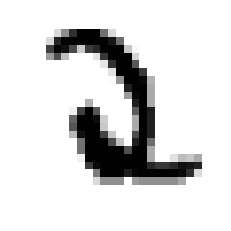

In [ ]:
some_digit = X[400]
plot_digit(some_digit)
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = X[:60000],X[60000:], y[:60000], y[60000:]

In [ ]:
#first we will create binary classifier for '5' digit

y_train_5 = (y_train=='5')
y_test_5 = (y_test=='5')

y_train_5, y_test_5

(array([ True, False, False, ...,  True, False, False]),
 array([False, False, False, ..., False,  True, False]))

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train=='5')

SGDClassifier(random_state=42)

In [ ]:
sgd_clf.predict([some_digit])


array([False])

In [ ]:
#now we will evaluate model using cross validation score of k folds,
#which divide training set in k folds and train and evaluate model for
#each of the folds

from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [ ]:
#the accuracy may look good but its just jokers luck as only 10% data is 5
#we now will create confusion matrix and for thst we need predicted data as well

from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score,recall_score

cm = confusion_matrix(y_train_5, y_train_pred)
precision = precision_score(y_train_5, y_train_pred)
recall = recall_score(y_train_5, y_train_pred)
cm, precision, recall

(array([[53892,   687],
        [ 1891,  3530]]), 0.8370879772350012, 0.6511713705958311)

In [ ]:
#to compare classifier models we use f1 score which is F1 = 2/(1/recall+1/precision)
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [ ]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method = 'decision_function')
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [ ]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

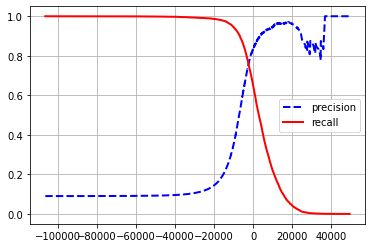

In [ ]:
plt.plot(thresholds, precisions[:-1], 'b--', label = 'Precision', linewidth=2)
plt.plot(thresholds, recalls[:-1], 'r-', label = "recall", linewidth=2)
plt.legend(["precision", "recall"])
plt.grid("on")
plt.show()

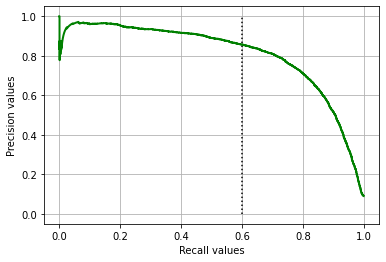

In [ ]:
plt.plot(recalls[:-1], precisions[:-1], 'g-', label="Precision/Recall curve", linewidth=2)
plt.xlabel("Recall values")
plt.ylabel("Precision values")
plt.grid("on")
plt.vlines(0.6, 0, 1.0, "k", "dotted", label="threshold")
plt.show()

In [ ]:
idx_90_precision = (precisions>=0.9).argmax()
threshold_90_precision = thresholds[idx_90_precision]

y_train_pred_90 = (y_scores>=threshold_90_precision)

In [ ]:
precision_score(y_train_5, y_train_pred_90)

recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

In [ ]:
# another method for checking performances apart from f scores and recall/precision is ROC(reciever operating characterstics) curve
# ROC curve plot the true positive rate(recall) against the false positive rate(fpr)

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)
idx_for_threshold_at_90 = (thresholds <= threshold_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]


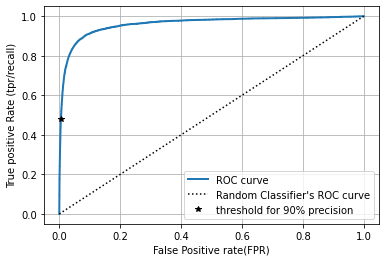

In [ ]:
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0,1],[0,1], 'k:', label="Random Classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "k*", label="Threshold for 90% precision")
plt.legend(["ROC curve", "Random Classifier's ROC curve", "threshold for 90% precision"])
plt.xlabel("False Positive rate(FPR)")
plt.ylabel("True positive Rate (tpr/recall)")
plt.grid("on")
plt.show()

In [ ]:
# the dotted line is 100% random CLassifier, a good classifier remains as far away from line as possible, we will now
# use roc under the curve area, a perfect classifier has 1 value, random classifier has 0.5 value

from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [ ]:
# now we will create randomForestClassifier to compare it with our sgd classifier

from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state = 42)

In [ ]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")
y_probas_forest[:2]

array([[0.11, 0.89],
       [0.99, 0.01]])

In [ ]:
# now for precision recall curve we want second column of probabilities

y_scores_forest = y_probas_forest[:, 1]
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(y_train_5, y_scores_forest)

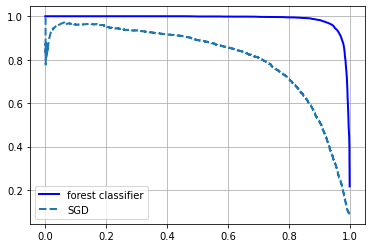

In [ ]:
from matplotlib import legend
plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2, label="Random Forest")
plt.plot(recalls, precisions, "--", linewidth=2,label="SGD")
plt.legend(["forest classifier", "SGD"])
plt.grid("on")
plt.show()

In [ ]:
recall_score(y_train_5, y_scores_forest>=0.5)
precision_score(y_train_5, y_scores_forest>0.5)

#we thus see, forest classifier performs much better than SGDClassifier

0.9905083315756169

In [ ]:
# we now have come to multiclass classifier part. here with using svm
from sklearn.svm import SVC

svm_clf = SVC(random_state = 42)
svm_clf.fit(X_train[:2000], y_train[:2000])  #only trying on 2000 data points




SVC(random_state=42)

In [ ]:
svm_clf.predict([some_digit])

array(['2'], dtype=object)

In [ ]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores.round(2)


array([[ 2.79, -0.29,  9.3 ,  6.14,  7.1 ,  3.81,  8.26,  0.74,  4.82,
         1.84]])

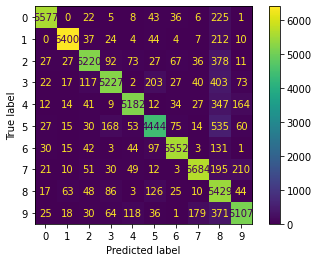

In [ ]:
# now we will plot confusion matrix diagram for beter analysis
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype("float64"))

from sklearn.metrics import ConfusionMatrixDisplay

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

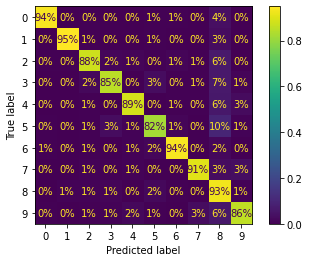

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize="true", values_format=".0%")
plt.show()